<a href="https://colab.research.google.com/github/aliss153/Aprendizaje-Automatico/blob/main/2-Ejercicios/07-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/07-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alisson Manosalvas &bull; 11 Enero 2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [30]:
# Paquetes necesarios
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

---
## <font color='264CC7'> Clasificación </font>

Se usará el conjunto de datos de dígitos de MNIST.

In [2]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

**- Muestra algunos datos.**

In [5]:
# Ver dimensiones
print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)

# Ver las primeras etiquetas
print("Primeras etiquetas:", y[:10])

Dimensión de X: (70000, 784)
Dimensión de y: (70000,)
Primeras etiquetas: 0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


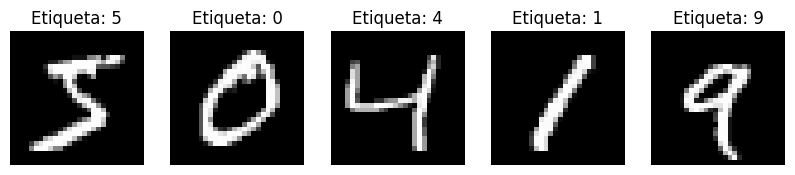

In [6]:
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta: {y.iloc[i]}")
    plt.axis('off')

plt.show()


**- Muestra una descripción de los datos.**

In [7]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


**- Escala los datos si es necesario**

Si se lo escala debido a que el dataset tiene valores grandes, y las redes neuronales aprenden mejor con datos pequños

In [8]:
X = X / 255.0


### <font color='264CC7'> Determinación de la red </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina una red neuronal para clasificar los datos:
<ul>
  <li>Define la red.</li>
  <li>Compila la red.</li>
  <li>Presenta un resumen de la red.</li>
</ul>
</div>


**- Define la red.**

In [11]:
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

**- Copilo la red**

In [12]:
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

**- Resúmen de la red**

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

**- Entreno el modelo.**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(56000, 784) (14000, 784)
(56000,) (14000,)


Aplico one-hot econding ya qye las etiquetas deben ser binarias

In [37]:
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

**- Evalúo el modelo**

In [38]:
history = model.fit(
    X_train, y_train_oh,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9948 - loss: 0.0240 - val_accuracy: 0.9759 - val_loss: 0.0842
Epoch 2/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9950 - loss: 0.0255 - val_accuracy: 0.9750 - val_loss: 0.0836
Epoch 3/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0245 - val_accuracy: 0.9746 - val_loss: 0.0842
Epoch 4/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9962 - loss: 0.0211 - val_accuracy: 0.9766 - val_loss: 0.0816
Epoch 5/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0215 - val_accuracy: 0.9757 - val_loss: 0.0826
Epoch 6/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9963 - loss: 0.0209 - val_accuracy: 0.9759 - val_loss: 0.0839
Epoch 7/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9961 - loss: 0.0207 - val_accuracy: 0.9761 - val_loss: 0.0805
Epoch 8/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0197 - 

**-Evalúo el modelo con el conjunto de datos de prueba.**

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_oh, verbose=0)

print(f"Pérdida en test: {test_loss:.4f}")
print(f"Exactitud en test: {test_accuracy:.4f}")

Pérdida en test: 0.1014
Exactitud en test: 0.9701


**- Genera una matriz de confusión y muestra las métricas de evaluación.**

In [39]:
# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Etiquetas reales a enteros
y_test_int = y_test.astype(int)

# 7. Matriz de confusión Y el reporte de clasificación
cm = confusion_matrix(y_test_int, y_pred)
print("Matriz de confusión:")
print(cm)
print("Reporte de clasificación:")
print(classification_report(y_test_int, y_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de confusión:
[[1370    0    2    1    1    3    1    0    2    1]
 [   0 1555    5    4    1    0    0    5    4    1]
 [   4    5 1365    5    3    0    2    6    7    1]
 [   1    2    8 1388    0   16    0    3    7    3]
 [   1    3    4    0 1322    0    5    2    2   26]
 [   3    2    0    7    2 1228    9    1    6    5]
 [   5    2    1    1    2    7 1356    0    1    0]
 [   2    4   10    2    9    2    0 1417    2   11]
 [   2    5    3   12    4    7    4    2 1319    7]
 [   3    4    0    7   22    5    0   12    8 1330]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1381
           1       0.98      0.99      0.99      1575
           2       0.98      0.98      0.98      1398
           3       0.97      0.97      0.97      1428
           4       0.97      0.97      0.97      1365
           5       0.97      0.97      0.97      1263
  

Se puede ver que en la matriz de confusión tiene una diagonal dominante con muchos acieretos, y en el reporte de clasificación su accurracy es 0.97 al igual que su precisión y recall, muestra un buen desempeño